## Importing libraries

In [82]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [83]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

## 1. Load data

In [84]:
# Read the CSV file 'Cars - Cars.csv' and store it in a data frame called 'df'
df = pd.read_csv('D:\ML\ml-a3\Cars.csv')

In [85]:
# Display the first few rows of the DataFrame 'df' to get a quick overview of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [86]:
# Get the dimensions of the DataFrame 'df' using the shape attribute
df.shape

(8128, 13)

In [87]:
# Generate descriptive statistics of the DataFrame 'df' using the describe() function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [88]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [89]:
# Create a mapping of unique owner categories to numerical values
category_mapping_owener = {category: index + 1 for index, category in enumerate(df['owner'].unique())}
# Apply the mapping to the 'owner' column and update it with encoded values
df['owner'] = df['owner'].map(category_mapping_owener)
print(category_mapping_owener)
df.head()

{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [90]:
#lambda function in somewhere later we need to check the owner category original value
get_key_by_value = lambda value: next((key for key, val in category_mapping_owener.items() if val == value), None)

In [91]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
df = df.drop(df[df['fuel'].isin(['CNG', 'LPG'])].index)


In [92]:
#For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float)
#Hint: usedf.mileage.str.split
# Split the 'Mileage' string and convert the numeric part to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Display the first few rows of the 'mileage' column in the DataFrame 'df' after modification
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [93]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [94]:
#For the feature max_power, remove Text part and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [95]:
# Rename the 'name' column to 'brand'
df = df.rename(columns={'name':'brand'})

# Extract the first word from the 'brand' column for each row
df['brand'] = df['brand'].str.split().str[0]
# The 'brand' column now contains only the first word of each brand name

In [96]:
#Drop the feature torque,
df.drop('torque', axis=1,inplace=True)

In [97]:
# Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
df = df.drop(df[df['owner'].isin([5])].index)

In [98]:
# Apply log transform to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price']) 

In [99]:
# Also Apply log transform to the 'km_driven' column
df['km_driven'] = np.log(df['km_driven']) 

In [100]:
# Display the first few rows of the DataFrame 'df'
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [101]:
# Define the percentiles to create four classes
percentiles = [0, 0.25, 0.5, 0.75, 1]

# Calculate the corresponding cutoff values
cutoffs = df['selling_price'].quantile(percentiles)

# Create labels for the four classes (0, 1, 2, 3)
labels = [0, 1, 2, 3]

# Use pd.cut to create the discrete variable
df['price_category'] = pd.cut(df['selling_price'], bins=cutoffs, labels=labels, include_lowest=True)

# Inspect the result
print(df[['selling_price', 'price_category']])

      selling_price price_category
0         13.017003              1
1         12.821258              1
2         11.970350              0
3         12.323856              0
4         11.775290              0
...             ...            ...
8123      12.676076              1
8124      11.813030              0
8125      12.853176              1
8126      12.577636              1
8127      12.577636              1

[8028 rows x 2 columns]


In [102]:
df.price_category.unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

Category of price has an order. For example, 
- category 3 has higher selling price than category 2 
- category 2 has higher selling price than category 1
- category 1 has higher selling price than category 0  

In [103]:
len(df.price_category.unique())

4

drop the selling_price column

In [104]:
df.drop('selling_price', axis=1, inplace=True)

In [105]:
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_category
0,Maruti,2014,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,1
1,Skoda,2014,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,1
2,Honda,2006,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,0
3,Hyundai,2010,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0
4,Maruti,2007,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0


## 2. EDA 

### EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [106]:
df.describe()

,year,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,10.859882,1.458022,19.391962,1462.914640,91.819726,5.421551
std,4.030836,0.868444,0.715283,4.001972,504.759742,35.804513,0.963125
min,1983.000000,6.907755,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,10.463103,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,11.002100,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,11.492723,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,14.674366,4.000000,42.000000,3604.000000,400.000000,14.000000


### 2.1. Univariate analysis

Single variable exploratory data anlaysis

#### Categorical Variables Univariate Analysis

A **count plot** is a type of bar plot that is specifically used to visualize the frequency distribution of categorical data. It's particularly useful when we want to understand the distribution of categories within a single categorical variable. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

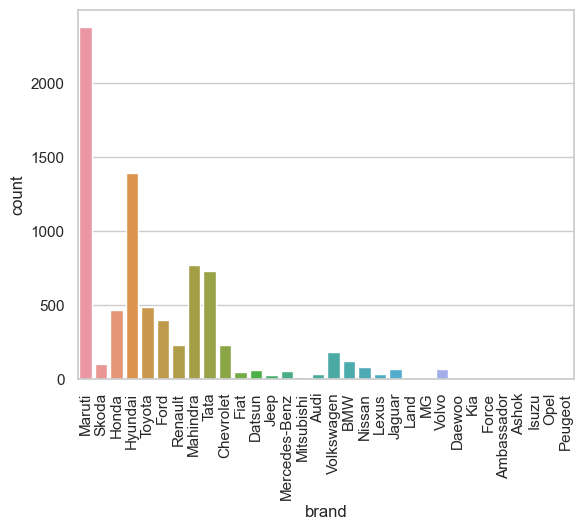

In [107]:
# Create a countplot to visualize the distribution of 'brand' column
sns.countplot(data = df, x ='brand')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

In [108]:
df.drop('brand', axis=1,inplace=True)   

We're using the matplotlib and seaborn libraries to create subplots with countplots for other categorical column in the DataFrame df. The loop iterates through the categorical columns, and for each column, a countplot is created. 

In [109]:
# List of categorical columns in the DataFrame other than 'brand'
categorical_cols = ['fuel','seller_type', 'transmission']

Text(0.5, 0.98, 'Frequency')

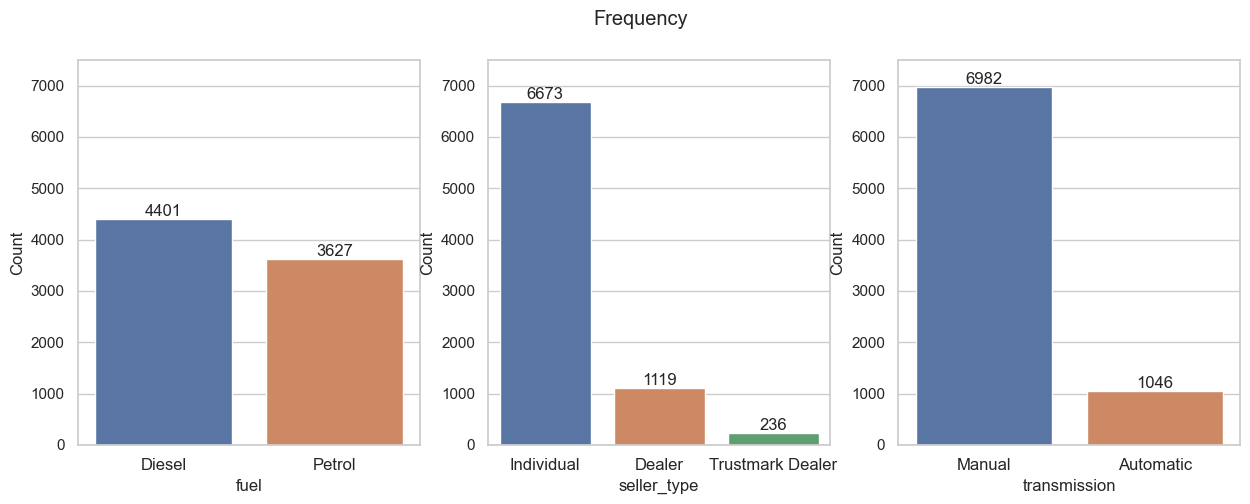

In [110]:
# Create a subplot layout with 1 row and 3 columns, set the figure size and dpi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
# Loop through the categorical columns for visualization
for i in range(len(categorical_cols)):
    #using countplot for visualizing the distribution of categorical data
    graph = sns.countplot(x= categorical_cols[i], data=df, ax=ax[i])
    
    # Set labels and formatting for the subplot
    ax[i].set_xlabel(categorical_cols[i], fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,7500])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    # Add labels to the bars
    for cont in graph.containers:
        graph.bar_label(cont)
# Set a title for the overall visualization
plt.suptitle('Frequency')

- There are 2 fuel categories. Diesel has the highest frequency and Petrol has the least frequency.
- There are 3 seller_type categories. Individual has the highest frequency and Trustmark has the least frequency.
- There are 2 transmission categories. Manual has the highest frequency and Automatic has the least frequency.

### Numerical Data Univariate Analysis

__Lineplot is commonly used to show trends, patterns, and changes in data over time or across a continuous variable.__

<Axes: xlabel='year', ylabel='price_category'>

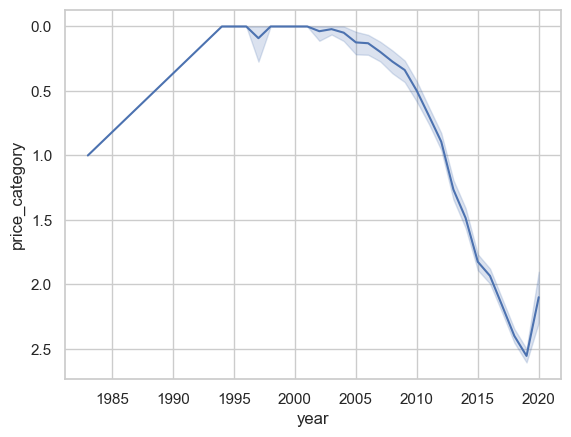

In [111]:
sns.lineplot(x='year',y='price_category',data=df,palette='tab20')

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year.

In [112]:
# Calculate and insert a new column 'age' based on the 'year' column
df.insert(0, "age", df["year"].max()+1-df["year"])
# Drop the 'year' column from the DataFrame
df.drop('year', axis=1, inplace=True)

In [113]:
df.head()

,age,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_category
0,7,11.887931,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,1
1,7,11.695247,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,1
2,15,11.849398,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,0
3,11,11.751942,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0
4,14,11.695247,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0


**we will analyze each numerical variable separately.**

 Histograms and bin edges are used in data visualization to represent the distribution of numerical data.
- A histogram is a graphical representation of the distribution of a dataset. It groups the data into "bins" or intervals and displays the frequency or count of data points that fall within each bin. 
- Bin edges are the boundaries that define the intervals for grouping data in a histogram.

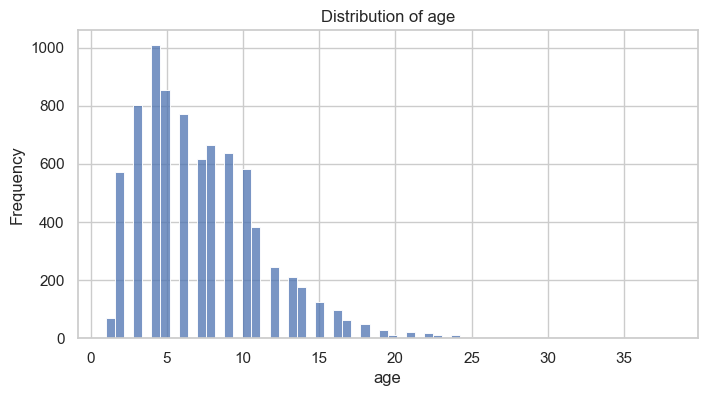

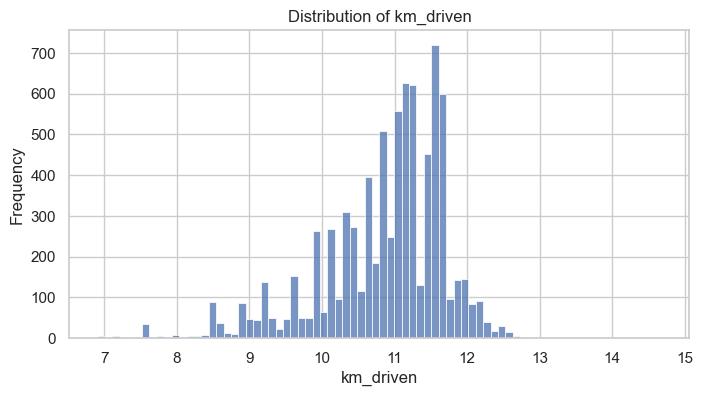

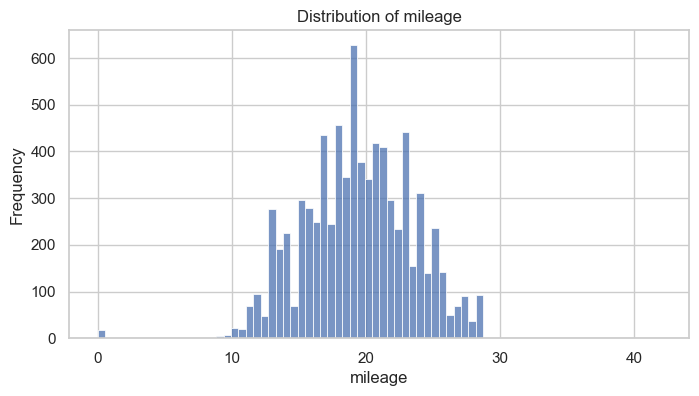

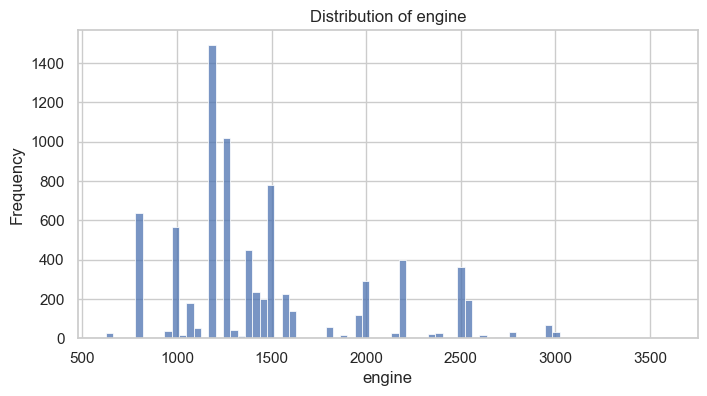

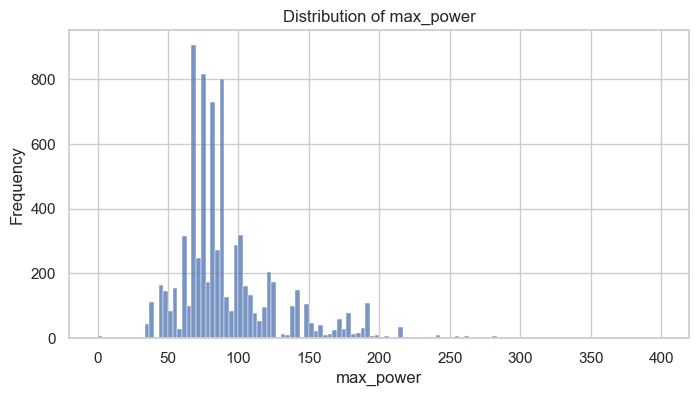

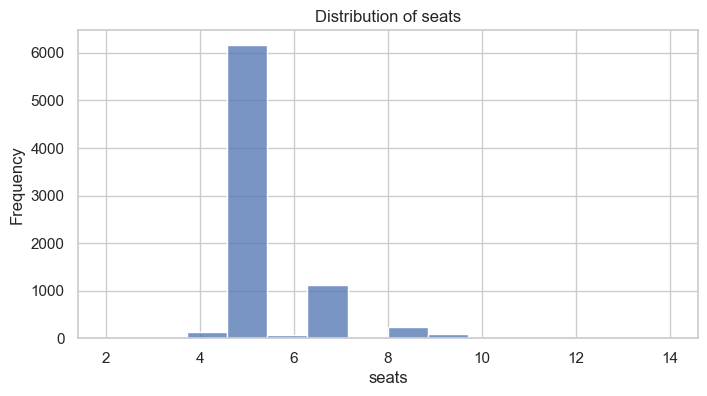

In [114]:
numerical_columns = ['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Loop through numerical columns for univariate analysis
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    # Plot a histogram
    sns.histplot(df[column])
    
    # Add labels and title
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()

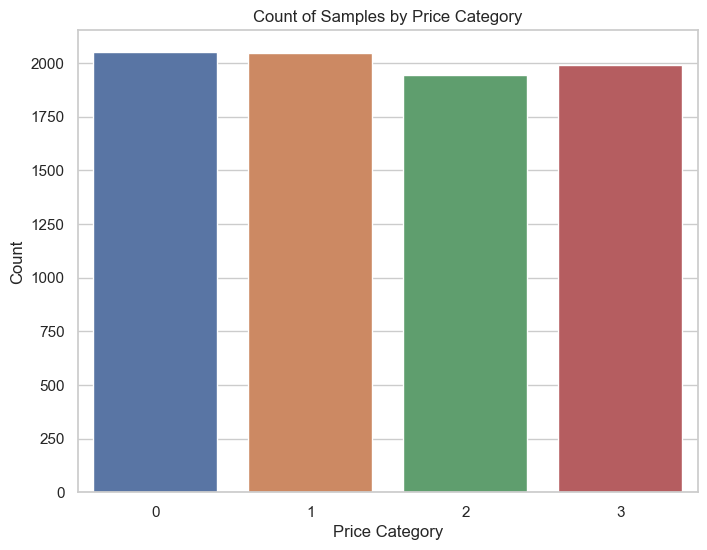

In [115]:
# Visualizations
# 1. Countplot of price_category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='price_category')
plt.title('Count of Samples by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


### 2.3. Multivariate analysis

Multiple variable exploratory data analysis
Box plots are great for comparing the distribution of a numeric variable across different categories 

- They display the median, quartiles, and possible outliers in a clear and compact manner.
- The x parameter specifies the categorical variable
- The y parameter specifies the numerical variable 

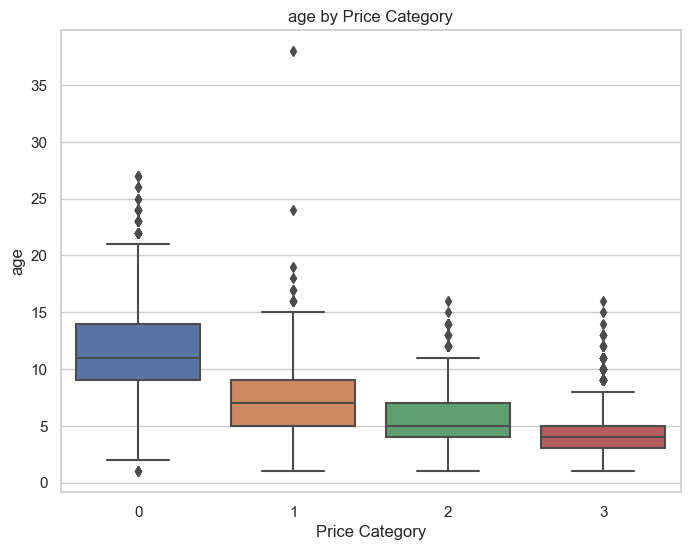

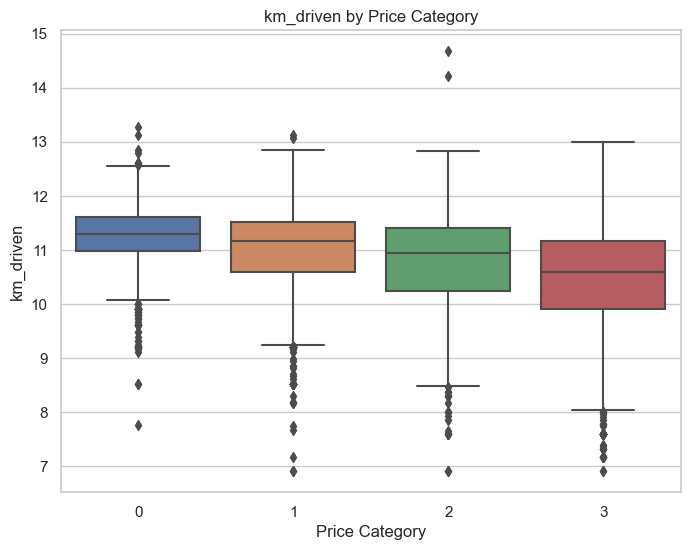

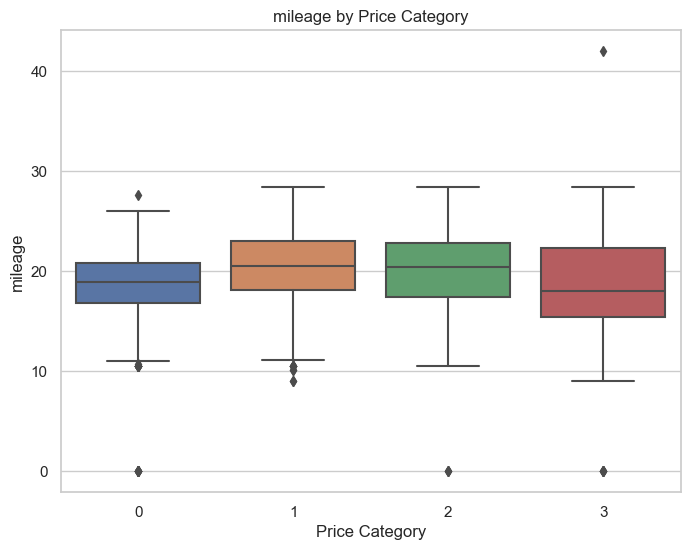

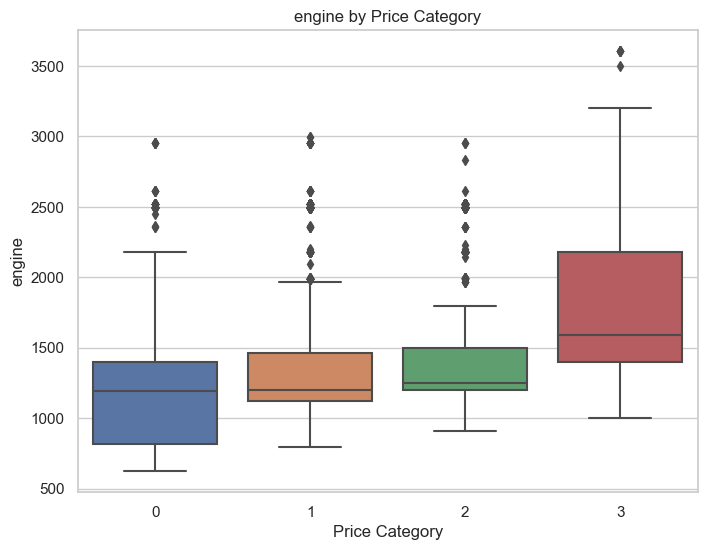

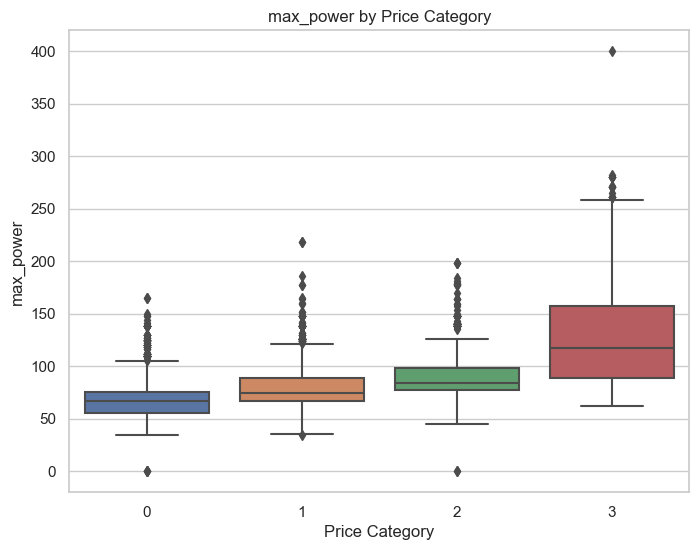

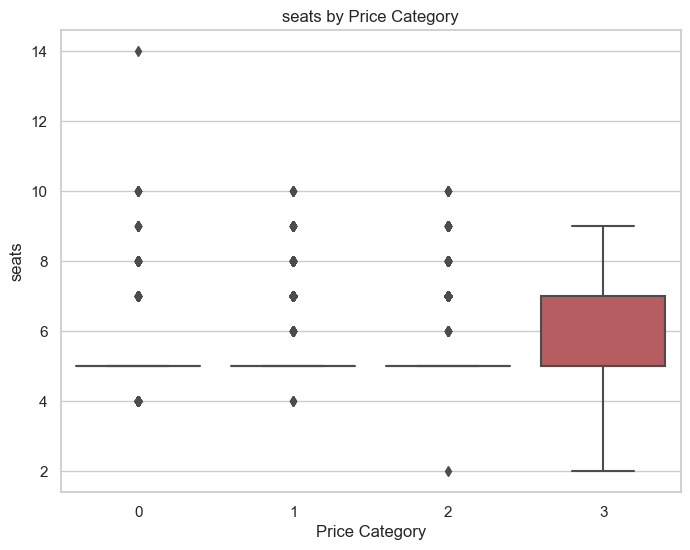

In [116]:
# 2. Boxplots for numerical features by price_category
numerical_features = ['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='price_category', y=feature)
    plt.title(f'{feature} by Price Category')
    plt.xlabel('Price Category')
    plt.ylabel(feature)
    plt.show()

#### Categorical Variables Encoding

In [118]:
# List of categorical columns to be one-hot encoded
cat_cols = ['fuel', 'seller_type', 'transmission']
# Use pandas get_dummies to perform one-hot encoding on the specified categorical columns
# Drop_first=True is used to prevent multicollinearity by dropping the first category
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# Display the first 5 rows of the modified DataFrame
df.head(5)

,age,km_driven,owner,mileage,engine,max_power,seats,price_category,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,7,11.887931,1,23.40,1248.0,74.00,5.0,1,0,1,0,1
1,7,11.695247,2,21.14,1498.0,103.52,5.0,1,0,1,0,1
2,15,11.849398,3,17.70,1497.0,78.00,5.0,0,1,1,0,1
3,11,11.751942,1,23.00,1396.0,90.00,5.0,0,0,1,0,1
4,14,11.695247,1,16.10,1298.0,88.20,5.0,0,1,1,0,1


In [119]:
# Convert price_category into one-hot encoded features
df_encoded = pd.get_dummies(df, columns=['price_category'], prefix='class')

In [120]:
df_encoded.head()

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,15,11.849398,3,17.70,1497.0,78.00,5.0,1,1,0,1,1,0,0,0
3,11,11.751942,1,23.00,1396.0,90.00,5.0,0,1,0,1,1,0,0,0
4,14,11.695247,1,16.10,1298.0,88.20,5.0,1,1,0,1,1,0,0,0


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling_price.
It's also for checking whether certain features are too correlated.


Let's Check the correlation before the encoding of the categorical variables

In [121]:
df_encoded.corr()

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
age,1.000000,0.529592,0.513135,-0.328817,-0.016725,-0.226345,0.007718,0.049176,0.246700,-0.102738,0.244663,0.639256,0.022057,-0.262820,-0.407069
km_driven,0.529592,1.000000,0.351317,-0.120452,0.172206,-0.099480,0.218665,-0.314919,0.267259,-0.121163,0.317749,0.258426,0.091191,-0.086113,-0.267527
owner,0.513135,0.351317,1.000000,-0.174818,0.007559,-0.110228,0.030173,-0.015134,0.223936,-0.077423,0.149047,0.350285,0.044296,-0.157740,-0.241934
mileage,-0.328817,-0.120452,-0.174818,1.000000,-0.578707,-0.372881,-0.454411,-0.069086,0.008412,-0.035549,0.177860,-0.103159,0.106714,0.105945,-0.110153
engine,-0.016725,0.172206,0.007559,-0.578707,1.000000,0.701834,0.610481,-0.503851,-0.128742,0.037387,-0.280823,-0.299391,-0.126655,-0.000927,0.422632
max_power,-0.226345,-0.099480,-0.110228,-0.372881,0.701834,1.000000,0.189248,-0.298088,-0.280548,0.025456,-0.539233,-0.377690,-0.174958,-0.021040,0.568307
seats,0.007718,0.218665,0.030173,-0.454411,0.610481,0.189248,1.000000,-0.352095,0.083137,-0.029106,0.074478,-0.173450,-0.044309,0.055280,0.160473
fuel_Petrol,0.049176,-0.314919,-0.015134,-0.069086,-0.503851,-0.298088,-0.352095,1.000000,-0.003889,0.141325,-0.029313,0.238677,0.052015,-0.015682,-0.277920
seller_type_Individual,0.246700,0.267259,0.223936,0.008412,-0.128742,-0.280548,0.083137,-0.003889,1.000000,-0.386209,0.372892,0.187616,0.119847,-0.051286,-0.259476
seller_type_Trustmark Dealer,-0.102738,-0.121163,-0.077423,-0.035549,0.037387,0.025456,-0.029106,0.141325,-0.386209,1.000000,-0.149513,-0.052871,-0.096635,0.073829,0.077644


<Axes: >

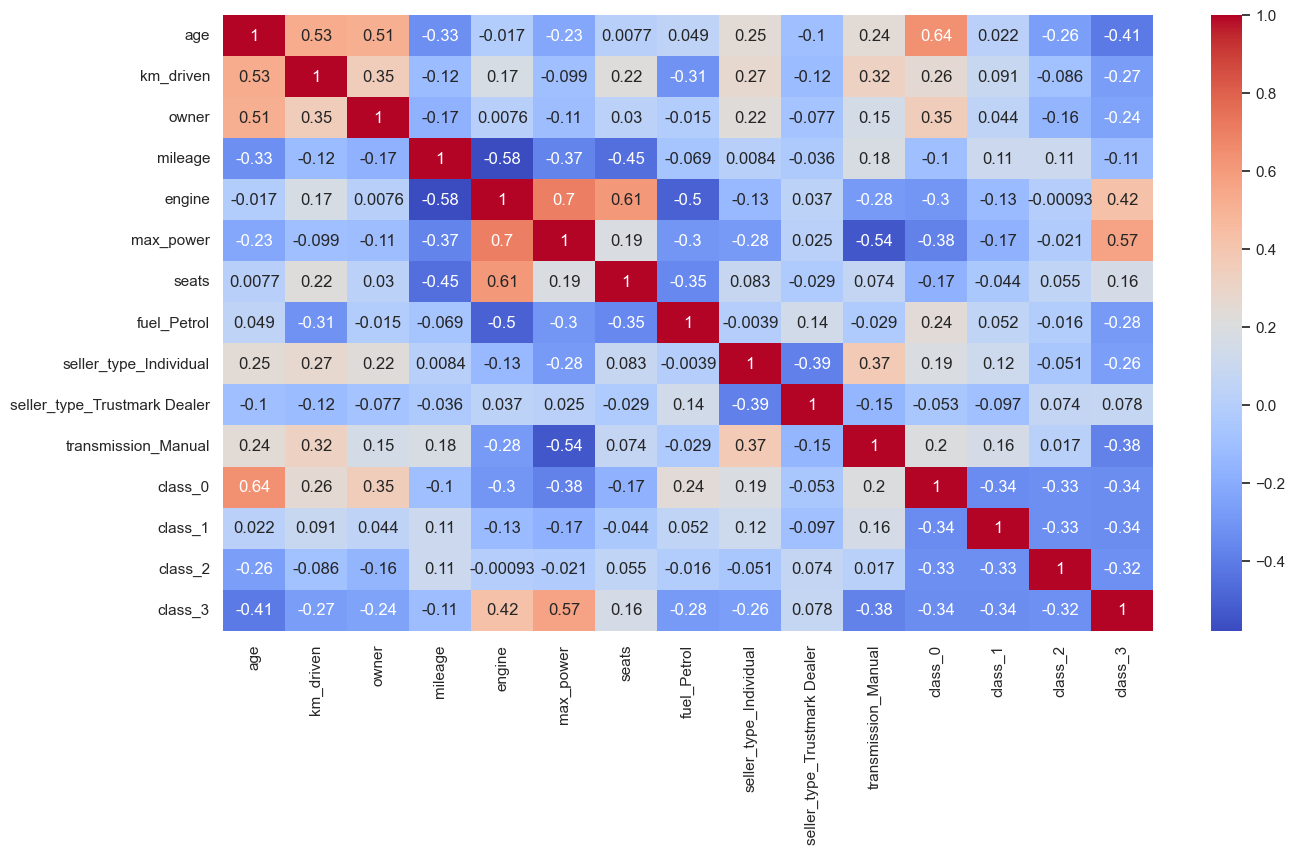

In [122]:
# Let's check out heatmap|
plt.figure(figsize = (15,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

### PPS Score

In [123]:
import ppscore as pps
# Create a copy of the encoded DataFrame for calculating predictive power scores
dfcopy = df_encoded.copy()
dfcopy.head(2)

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,11.887931,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,11.695247,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0


<Axes: xlabel='x', ylabel='y'>

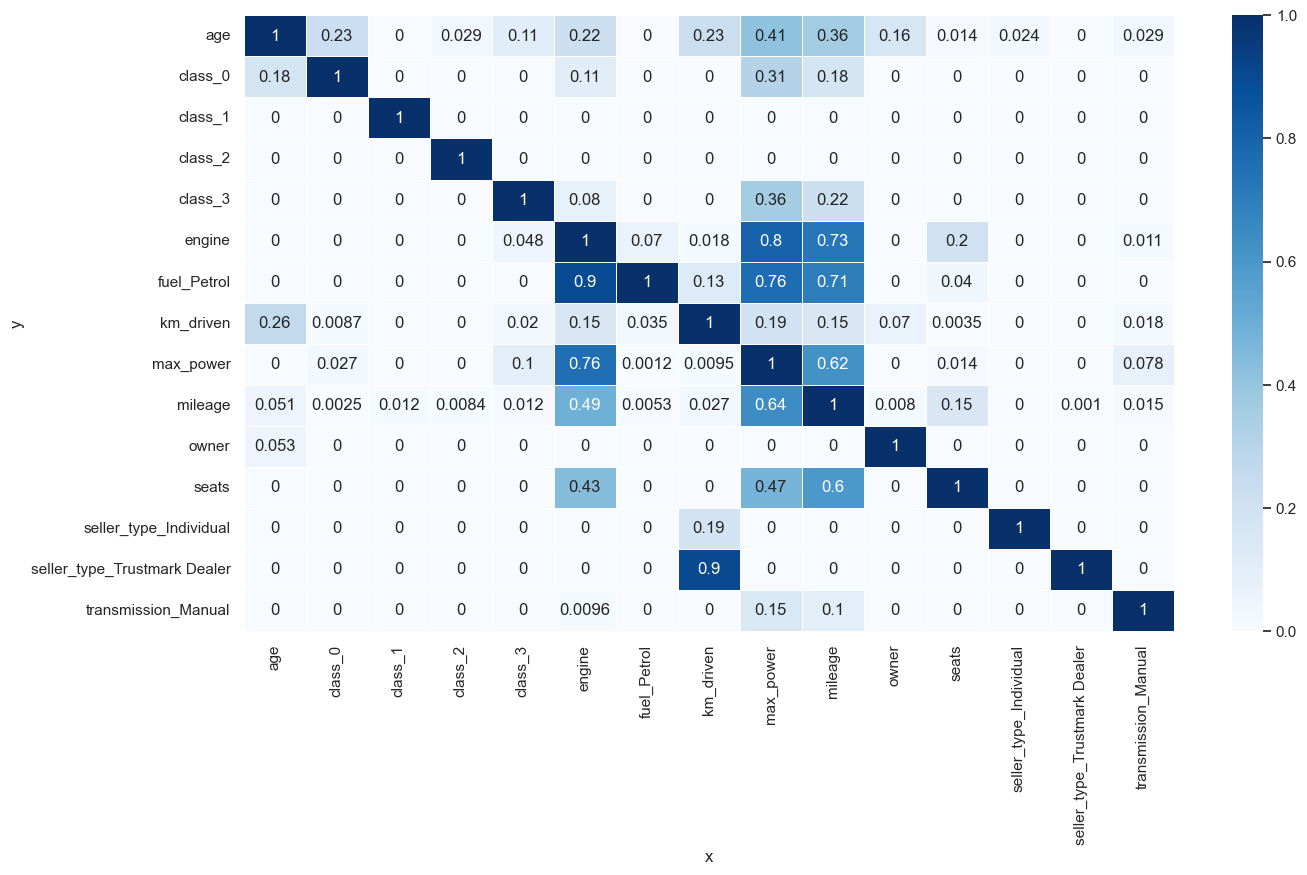

In [124]:
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature Engineering

In this Selling_price Category prediction we generated a feature called age by subtracting the year of car made from the max year of the dataset

## 4. Feature selection

In [125]:
# Define the list of selected features for prediction
feature_list  = ['km_driven','age','engine','fuel_Petrol','transmission_Manual']

In [126]:
# # Create the feature matrix X by selecting the specified features
X = df_encoded[feature_list]
# # Create the target vector y using the 'selling_price' column
y = df_encoded[['class_0', 'class_1', 'class_2', 'class_3']]

In [127]:
X.shape, y.shape

((8028, 5), (8028, 4))

### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [128]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set test_size to 0.3 for a 70-30 train-test split
# Use random_state for reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [129]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 5), (2409, 5), (5619, 4), (2409, 4))

In [130]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Test Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Test Dataset Size 2409


In [131]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]

## 5. Preprocessing

### Check Null values

In [132]:
# Check for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [133]:
# Check for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [134]:
# Check for null values in the training target vector y_train
y_train.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

In [135]:
# Check for null values in the training target vector y_test
y_test.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

In [136]:
len(feature_list)

5

In [137]:
feature_list

['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual']

__Among the 5 features only 'engine' contains null values__

In [138]:
# Impute the missing values in the 'engine' feature with the mean value for training set
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
# Impute the missing values in the 'engine' feature with the mean value for testing set
X_test['engine'].fillna(X_test['engine'].mean(), inplace=True)

In [139]:
# Check again for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [140]:
# Check again for null values in the selected features of the test set
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [141]:
# Check for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64,
 class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64)

In [146]:
X_train.head()

,km_driven,age,engine,fuel_Petrol,transmission_Manual
6853,11.695247,6,2499.0,0,1
1495,11.407565,8,2523.0,0,1
7904,11.429544,8,1248.0,0,1
1281,11.512925,11,1248.0,0,1
1421,11.695247,11,1396.0,0,1


### Scaling

In [147]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
feature_list_continuous = ['km_driven', 'age', 'engine']
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the selected numerical features in the training set
X_train[feature_list_continuous] = scaler.fit_transform(X_train[feature_list_continuous])
# Standardize the selected numerical features in the testing set
X_test[feature_list_continuous]  = scaler.transform(X_test[feature_list_continuous])

In [148]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619, 4)
Shape of y_test:  (2409, 4)


In [149]:
#add intercept in both training and testing feature
X_train['intercept'] = 1
X_test['intercept'] = 1

In [150]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape, type(X_train))
print("Shape of X_test: ", X_test.shape, type(X_test))
print("Shape of y_train: ", y_train.shape, type(y_train))
print("Shape of y_test: ", y_test.shape, type(y_test))

Shape of X_train:  (5619, 6) <class 'pandas.core.frame.DataFrame'>
Shape of X_test:  (2409, 6) <class 'pandas.core.frame.DataFrame'>
Shape of y_train:  (5619, 4) <class 'pandas.core.frame.DataFrame'>
Shape of y_test:  (2409, 4) <class 'pandas.core.frame.DataFrame'>


In [151]:
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Convert pandas Series to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

In [152]:
def assert_shapes(X_train, X_test, y_train, y_test):
    assert X_train.shape[0] == y_train.shape[0], "X_train and y_train should have the same number of samples."
    assert X_test.shape[0] == y_test.shape[0], "X_test and y_test should have the same number of samples."
    assert X_train.shape[1] == X_test.shape[1], "X_train and X_test should have the same number of features."
    
    print("Shapes assertion successful!")

In [153]:
assert_shapes(X_train_np, X_test_np, y_train_np, y_test_np)

Shapes assertion successful!


In [158]:
#experiment tracking
import os
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment(experiment_name="st124409-a3")

PydanticUserError: If you use `@root_validator` with pre=False (the default) you MUST specify `skip_on_failure=True`. Note that `@root_validator` is deprecated and should be replaced with `@model_validator`.

For further information visit https://errors.pydantic.dev/2.4/u/root-validator-pre-skip

In [ ]:
import time

### 6. Modeling

In [ ]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def accuracy(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        # Calculate the number of correct predictions
        num_correct = np.sum(Y_true == Y_pred)
        
        # Calculate the accuracy
        accuracy = num_correct / Y_true.shape[0]
        
        return accuracy
    
    def precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for c in range(num_classes):
            # Calculate True Positives, False Positives, True Negatives, and False Negatives for class c
            TP_c = np.sum((Y_true == c) & (Y_pred == c))
            FP_c = np.sum((Y_true != c) & (Y_pred == c))
            TN_c = np.sum((Y_true != c) & (Y_pred != c))
            FN_c = np.sum((Y_true == c) & (Y_pred != c))

            # Calculate precision, recall, and F1-score for class c
            precision_c = TP_c / (TP_c + FP_c) if (TP_c + FP_c) > 0 else 0.0
            recall_c = TP_c / (TP_c + FN_c) if (TP_c + FN_c) > 0 else 0.0
            f1_c = 2 * precision_c * recall_c / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

            precision_scores.append(precision_c)
            recall_scores.append(recall_c)
            f1_scores.append(f1_c)

        return precision_scores, recall_scores, f1_scores
    
    def macro_precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate macro precision, macro recall, and macro F1-score
        macro_precision = sum(precision_scores) / num_classes
        macro_recall = sum(recall_scores) / num_classes
        macro_f1 = sum(f1_scores) / num_classes

        return macro_precision, macro_recall, macro_f1
    
    def weighted_precision_recall_f1(self, Y_true, Y_pred, class_weights):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate weighted precision, weighted recall, and weighted F1-score
        weighted_precision = sum(p * w for p, w in zip(precision_scores, class_weights))
        weighted_recall = sum(r * w for r, w in zip(recall_scores, class_weights))
        weighted_f1 = sum(f * w for f, w in zip(f1_scores, class_weights))

        return weighted_precision, weighted_recall, weighted_f1

    

    def custom_classification_report_df(self, Y_true, Y_pred, class_names=None, class_weights=None):
        num_classes = self.k

        if class_names is None:
            class_names = [str(i) for i in range(num_classes)]

        # Calculate accuracy
        accuracy = self.accuracy(Y_true, Y_pred)

        # Calculate precision, recall, F1-score, and support
        precision, recall, f1 = self.precision_recall_f1(Y_true, Y_pred)

        support = []

        for c in range(num_classes):
            # Calculate support for class c
            support_c = np.sum(Y_true == c)
            support.append(support_c)

        # Calculate macro and weighted metrics
        macro_precision, macro_recall, macro_f1 = self.macro_precision_recall_f1(Y_true, Y_pred)

        if class_weights is None:
            # If class_weights is not provided, assume equal weights for all classes
            class_weights = [1.0] * num_classes
            
        weighted_precision, weighted_recall, weighted_f1 = self.weighted_precision_recall_f1(Y_true, Y_pred, class_weights)

        # Create a DataFrame to store the classification report
        report_df = pd.DataFrame({
            'Class': class_names,
            'Precision': [round(p, 2) for p in precision],
            'Recall': [round(r, 2) for r in recall],
            'F1-Score': [round(f, 2) for f in f1],
            'Support': support
        })

        # Add accuracy, macro, and weighted metrics to the DataFrame
        report_df = report_df.append({
            'Class': 'Accuracy',
            'Precision': round(accuracy, 2),
            'Recall': '',
            'F1-Score': '',
            'Support': len(Y_true) 
        }, ignore_index=True)

        report_df = report_df.append({
            'Class': 'Macro Avg',
            'Precision': round(macro_precision, 2),
            'Recall': round(macro_recall, 2),
            'F1-Score': round(macro_f1, 2),
            'Support': len(Y_true) 
        }, ignore_index=True)

        report_df = report_df.append({
            'Class': 'Weighted Avg',
            'Precision': round(weighted_precision, 2),
            'Recall': round(weighted_recall, 2),
            'F1-Score': round(weighted_f1, 2),
            'Support': len(Y_true) 
        }, ignore_index=True)

        return report_df
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [ ]:
class RidgeLogisticRegression(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000, lambda_=1.0):
        super().__init__(k, n, method, alpha, max_iter)
        self.lambda_ = lambda_

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        # Calculate the gradient with the L2 regularization term
        grad = self.softmax_grad(X, error) + 2 * self.lambda_ * self.W

        return loss, grad


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [157]:
methods = ['batch', 'sto','minibatch']
alpha_li =  [0.01, 0.001, 0.0001]

for method in methods:
    for lr in alpha_li:
        params = {"method": method,"lr": lr, "lambda": 0.1}
        print(params)
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{'Ridgle'}-lambda-{params['lambda']}", nested=True)
        ridge_model = RidgeLogisticRegression(k=4, n=6, method=params['method'],alpha=params['lr'], lambda_=params['lambda'])
        ridge_model.fit(X_train_np, y_train_np)

        # Make predictions on the test data
        ridge_Y_test_pred = ridge_model.predict(X_test_np)

        accuracy_scratch = ridge_model.accuracy(y_test_np.argmax(axis=1), ridge_Y_test_pred)
        mlflow.log_metrics({
        'Accuracy': accuracy_scratch
        })
        
        precision, recall, f1 = ridge_model.precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)

        # macro_precision_recall_f1 returns macro metrics
        macro_precision, macro_recall, macro_f1 = ridge_model.macro_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)

        # Log precision, recall, F1 score, and accuracy as metrics
        mlflow.log_metrics({
            'Macro Precision': macro_precision,
            'Macro Recall': macro_recall,
            'Macro F1-Score': macro_f1,
        })

        # weighted_precision_recall_f1 returns weighted metrics
        weighted_precision, weighted_recall, weighted_f1 = ridge_model.weighted_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred, [0.2, 0.3, 0.2, 0.3])

        mlflow.log_metrics({
            'Weighted Precision': weighted_precision,
            'Weighted Recall': weighted_recall,
            'Weighted F1-Score': weighted_f1,
        })


        cus_class_report = ridge_model.custom_classification_report_df(y_test_np.argmax(axis=1), ridge_Y_test_pred,class_weights=[0.2, 0.3, 0.2, 0.3])

        sk_class_report = classification_report(y_test_np.argmax(axis=1), ridge_Y_test_pred)
        
        print('Custom Classification Report:')
        display(cus_class_report)
        print('sklearn Classification Report:')
        print(sk_class_report)
        print("-"*50)

        signature = mlflow.models.infer_signature(X_train_np, ridge_model.predict(X_train_np))
        mlflow.sklearn.log_model(ridge_model, artifact_path='model', signature=signature)
        # ridge_model.plot()
        mlflow.end_run() 

{'method': 'batch', 'lr': 0.01, 'lambda': 0.1}


NameError: name 'mlflow' is not defined

*the classification report of our custom function and the sklearn function is identical.*

![](Screenshots/loss-plot.png)

![](Screenshots/stagging.png)

### Inference with MLflow registered Model

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import mlflow

In [ ]:
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th")
mlflow.set_experiment(experiment_name="st124409-a3")

<Experiment: artifact_location='mlflow-artifacts:/589799493908908443', creation_time=1695815973047, experiment_id='589799493908908443', last_update_time=1695815973047, lifecycle_stage='active', name='st124047-a3', tags={}>

In [ ]:
model_name = 'st124409-a3'
model_version = 'Staging'

loaded_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)


In [ ]:
#infer from test data for 10 random sample from test data

for _ in range(10):
    # Choose a random index to select a random sample from X_test_np
    random_index = np.random.randint(0, len(X_test_np))
    single_sample = X_test_np[random_index].reshape(1,-1)
    test_pred = loaded_model.predict(single_sample)
    # Get the corresponding actual class label from y_test_np
    actual_class_label = y_test_np[random_index]

    # Print the predicted class label and the actual class label
    print("Predicted Class Label:", test_pred)
    print("Actual Class Label:", actual_class_label)

Predicted Class Label: [0]
Actual Class Label: [1 0 0 0]
Predicted Class Label: [1]
Actual Class Label: [0 1 0 0]
Predicted Class Label: [2]
Actual Class Label: [0 0 0 1]
Predicted Class Label: [2]
Actual Class Label: [0 0 0 1]
Predicted Class Label: [1]
Actual Class Label: [0 0 1 0]
Predicted Class Label: [1]
Actual Class Label: [0 1 0 0]
Predicted Class Label: [0]
Actual Class Label: [0 1 0 0]
Predicted Class Label: [1]
Actual Class Label: [0 1 0 0]
Predicted Class Label: [3]
Actual Class Label: [0 0 0 1]
Predicted Class Label: [0]
Actual Class Label: [1 0 0 0]
